In [1]:
from imagededup.utils import plot_duplicates
from imagededup.methods import CNN

cnn = CNN()

2025-04-01 12:40:33,845: INFO Device set to cuda ..
2025-04-01 12:40:33,965: INFO Initialized: mobilenet_v3_small for feature extraction ..


In [2]:
path = "/mnt/crucial_mx500/darkroom/image/archived/"
duplicates = cnn.find_duplicates(
    image_dir=path,
    min_similarity_threshold=0.9,
    recursive=True,
    scores=True,
    num_enc_workers=4,
    outfile="dups.json",
)

2025-04-01 12:40:33,976: INFO Start: Image encoding generation
2025-04-01 12:46:45,383: WARNING Invalid image file /mnt/crucial_mx500/darkroom/image/archived/2025-02/file 1440x1080/file 1440x1080_019857.jpg:
broken data stream when reading image file
2025-04-01 12:46:45,418: WARNING Invalid image file /mnt/crucial_mx500/darkroom/image/archived/2025-02/file 1440x1080/file 1440x1080_019875.jpg:
broken data stream when reading image file
2025-04-01 12:46:45,434: WARNING Invalid image file /mnt/crucial_mx500/darkroom/image/archived/2025-02/file 1440x1080/file 1440x1080_019904.jpg:
broken data stream when reading image file
2025-04-01 12:46:45,454: WARNING Invalid image file /mnt/crucial_mx500/darkroom/image/archived/2025-02/file 1440x1080/file 1440x1080_019910.jpg:
broken data stream when reading image file
2025-04-01 12:46:45,467: WARNING Invalid image file /mnt/crucial_mx500/darkroom/image/archived/2025-02/file 1440x1080/file 1440x1080_019915.jpg:
broken data stream when reading image fi

In [3]:
import json
import numpy as np


# Convert float16 to regular Python float
def convert_float16(obj):
    if isinstance(obj, np.float16):  # type: ignore
        return float(obj)
    return obj


# If dups is a dictionary/list containing float16 values
non_empty_dups = {k: v for k, v in duplicates.items() if v}
json.dump(
    json.loads(json.dumps(non_empty_dups, default=convert_float16)),
    open("non_empty_dups.json", "w"),
)

In [4]:
non_empty_dups

{np.str_('2013-07/Apple iPhone 4 2592x1936_082356.jpg'): [(np.str_('2013-07/Apple iPhone 4 2592x1936_082558.jpg'),
   0.95947265625)],
 np.str_('2013-07/Apple iPhone 4 2592x1936_082558.jpg'): [(np.str_('2013-07/Apple iPhone 4 2592x1936_082356.jpg'),
   0.95947265625)],
 np.str_('2013-07/Apple iPhone 4 2592x1936_082721.jpg'): [(np.str_('2013-07/Apple iPhone 4 2592x1936_082987.jpg'),
   0.96728515625)],
 np.str_('2013-07/Apple iPhone 4 2592x1936_082987.jpg'): [(np.str_('2013-07/Apple iPhone 4 2592x1936_082721.jpg'),
   0.96728515625)],
 np.str_('2013-08/Apple iPhone 4 2592x1936_082368.jpg'): [(np.str_('2013-08/Apple iPhone 4 2592x1936_083094.jpg'),
   0.9267578125),
  (np.str_('2013-08/Apple iPhone 4 2592x1936_083160.jpg'), 0.93798828125)],
 np.str_('2013-08/Apple iPhone 4 2592x1936_082373.jpg'): [(np.str_('2013-08/Apple iPhone 4 2592x1936_082641.jpg'),
   0.93408203125),
  (np.str_('2013-08/Apple iPhone 4 2592x1936_082779.jpg'), 0.90087890625),
  (np.str_('2025-02/file 2592x1936/file 25

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/crucial_mx500/darkroom/image/archived/2013-07/Apple iPhone 4 2592x1936_082356.jpg'

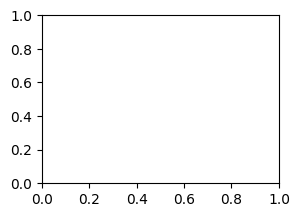

In [6]:
plot_duplicates(
    image_dir=path,
    duplicate_map=non_empty_dups,
    filename=list(non_empty_dups.keys())[0],
)
